In [1]:
import sys
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, models
from torchvision.transforms import v2
from CustomModels import CtWeightRegressorAdditionalParams2D

In [7]:
from pathlib import Path
from torch.utils.data import DataLoader, random_split
# include ../../3_Datapreparation
project_dir = Path(os.getcwd()).resolve().parent.parent
sys.path.append(str(project_dir / '3_Data_Preparation'))
from CT_Datasets import CtScanDataset, CtScanDatasetExtended

In [3]:
dataset = CtScanDataset(df_query='BodyPart == "Stamm"', transform=None)
print(dataset[0][0].shape)
dataset[0]

(567, 512, 512)


(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [8]:
train_dataset, val_dataset = random_split(
            dataset, [int(0.8 * len(dataset)), len(dataset) - int(0.8 * len(dataset))],
            generator=torch.Generator().manual_seed(42)
        )

In [13]:
train_dataset[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [4]:
dataset_extended = CtScanDatasetExtended(df_query='BodyPart == "Stamm"', pixel_array_transform=None, imagenet_scaling_factor=True)
print(dataset_extended[0][0].shape)
dataset_extended[0]

(567, 512, 512)


(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [5]:
from Transforms import Transforms

transforms = v2.Compose([
    # change the data type to uint32 -> prevents overflow
    v2.Lambda(lambda x: x.astype(np.float32)),
    # sum up all the pixel values over an axis and project them onto a 2D plane (Axial Projection)
    v2.Lambda(lambda x: x.sum(axis=2)),
    # add color channel dimension
    v2.Lambda(lambda x: x[:, :, np.newaxis]),
    # repeat color channel 3 times (RGB)
    v2.Lambda(lambda x: np.repeat(x, 3, axis=2)),
    # To PIL Image (required for torchvision transforms)
    v2.ToImage(),
    # Scale images to 224x224
    v2.Resize((224, 224), antialias=True),
    # Normalize tensor values to range [0, 1] with lambda function
    Transforms.ScaleTo01(),
    # Normalize with mean and std
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# apply the transform to the dataset
transformed = CtScanDataset(df_query='BodyPart == "Stamm"', transform=transforms)

In [6]:
transformed[0]

(tensor([[[-2.1125, -2.0913, -2.0751,  ..., -2.0278, -2.0550, -2.0909],
          [-2.1126, -2.0914, -2.0752,  ..., -2.0276, -2.0550, -2.0909],
          [-2.1126, -2.0913, -2.0752,  ..., -2.0266, -2.0543, -2.0905],
          ...,
          [-2.1133, -2.0927, -2.0765,  ..., -2.0393, -2.0634, -2.0952],
          [-2.1126, -2.0918, -2.0754,  ..., -2.0384, -2.0628, -2.0947],
          [-2.1119, -2.0904, -2.0736,  ..., -2.0386, -2.0631, -2.0948]],
 
         [[-2.0302, -2.0085, -1.9920,  ..., -1.9436, -1.9715, -2.0081],
          [-2.0303, -2.0086, -1.9921,  ..., -1.9434, -1.9714, -2.0081],
          [-2.0303, -2.0085, -1.9921,  ..., -1.9424, -1.9707, -2.0077],
          ...,
          [-2.0310, -2.0100, -1.9934,  ..., -1.9553, -1.9800, -2.0125],
          [-2.0303, -2.0090, -1.9922,  ..., -1.9544, -1.9794, -2.0120],
          [-2.0296, -2.0076, -1.9905,  ..., -1.9547, -1.9797, -2.0121]],
 
         [[-1.7989, -1.7774, -1.7609,  ..., -1.7127, -1.7405, -1.7770],
          [-1.7990, -1.7775,

In [7]:
transformed[0][0]

tensor([[[-2.1125, -2.0913, -2.0751,  ..., -2.0278, -2.0550, -2.0909],
         [-2.1126, -2.0914, -2.0752,  ..., -2.0276, -2.0550, -2.0909],
         [-2.1126, -2.0913, -2.0752,  ..., -2.0266, -2.0543, -2.0905],
         ...,
         [-2.1133, -2.0927, -2.0765,  ..., -2.0393, -2.0634, -2.0952],
         [-2.1126, -2.0918, -2.0754,  ..., -2.0384, -2.0628, -2.0947],
         [-2.1119, -2.0904, -2.0736,  ..., -2.0386, -2.0631, -2.0948]],

        [[-2.0302, -2.0085, -1.9920,  ..., -1.9436, -1.9715, -2.0081],
         [-2.0303, -2.0086, -1.9921,  ..., -1.9434, -1.9714, -2.0081],
         [-2.0303, -2.0085, -1.9921,  ..., -1.9424, -1.9707, -2.0077],
         ...,
         [-2.0310, -2.0100, -1.9934,  ..., -1.9553, -1.9800, -2.0125],
         [-2.0303, -2.0090, -1.9922,  ..., -1.9544, -1.9794, -2.0120],
         [-2.0296, -2.0076, -1.9905,  ..., -1.9547, -1.9797, -2.0121]],

        [[-1.7989, -1.7774, -1.7609,  ..., -1.7127, -1.7405, -1.7770],
         [-1.7990, -1.7775, -1.7610,  ..., -1

In [8]:
transformed[0][0].shape

torch.Size([3, 224, 224])

In [9]:
torch.max(transformed[0][0])

tensor(2.6400)

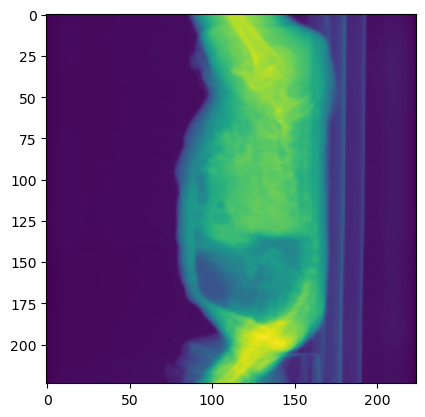

In [10]:
# plot the transformed image
import matplotlib.pyplot as plt
# scale the pixel values back to [0, 255]
plt.imshow(transformed[0][0][0,:,:])

In [11]:
type(transformed[0][1])

numpy.float32

In [12]:
type(transformed[0][0][0,0,0])

torch.Tensor

In [13]:
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader, Dataset
from torchvision.models.resnet import ResNet18_Weights

In [14]:
# Load a pretrained ResNet model
resnet = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

# Modify the fully connected layer
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, 1)  # Regression output layer

# Print the modified model (optional)
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
# train/validation split
train_set, val_set = torch.utils.data.random_split(transformed, [0.8, 0.2], generator=torch.Generator().manual_seed(42))

In [16]:
# Hyperparameters
learning_rate = 0.001
num_epochs = 20
batch_size = 32

# Loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss for regression
optimizer = optim.Adam(resnet.parameters(), lr=learning_rate)

# Assuming you have your dataset ready
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_set, batch_size=batch_size, shuffle=False)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet.to(device)
print("Device:", device)

Device: cuda


In [17]:
# Initialize lists to store losses
train_losses = []
val_losses = []

# Training and validation loop
for epoch in range(num_epochs):
    resnet.train()
    running_train_loss = 0.0
    
    # Training loop
    for inputs, targets in train_loader:
        inputs, targets = inputs.float().to(device), targets.float().to(device)

        optimizer.zero_grad()

        outputs = resnet(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

    # Compute the average training loss for this epoch
    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # Validation loop (no gradients needed)
    resnet.eval()
    running_val_loss = 0.0
    
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.float().to(device), targets.float().to(device)

            outputs = resnet(inputs)
            loss = criterion(outputs.squeeze(), targets)
            running_val_loss += loss.item()

    # Compute the average validation loss for this epoch
    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Print epoch summary
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

Epoch [1/20], Train Loss: 5606.6903, Val Loss: 6120.0127
Epoch [2/20], Train Loss: 4673.3620, Val Loss: 2867.6899
Epoch [3/20], Train Loss: 3919.2679, Val Loss: 2902.3036
Epoch [4/20], Train Loss: 3232.4192, Val Loss: 3347.4222
Epoch [5/20], Train Loss: 2548.2864, Val Loss: 2117.9937
Epoch [6/20], Train Loss: 1899.1421, Val Loss: 2303.3580
Epoch [7/20], Train Loss: 1361.9635, Val Loss: 1521.7005
Epoch [8/20], Train Loss: 932.1732, Val Loss: 445.6749
Epoch [9/20], Train Loss: 609.4884, Val Loss: 150.4215
Epoch [10/20], Train Loss: 347.2059, Val Loss: 1547.4369
Epoch [11/20], Train Loss: 207.5025, Val Loss: 143.4379
Epoch [12/20], Train Loss: 134.7713, Val Loss: 124.3152
Epoch [13/20], Train Loss: 90.9021, Val Loss: 177.1155
Epoch [14/20], Train Loss: 44.6747, Val Loss: 150.1958
Epoch [15/20], Train Loss: 41.8090, Val Loss: 144.1351
Epoch [16/20], Train Loss: 33.2095, Val Loss: 187.4650
Epoch [17/20], Train Loss: 18.6447, Val Loss: 42.8444
Epoch [18/20], Train Loss: 18.0623, Val Loss: 57

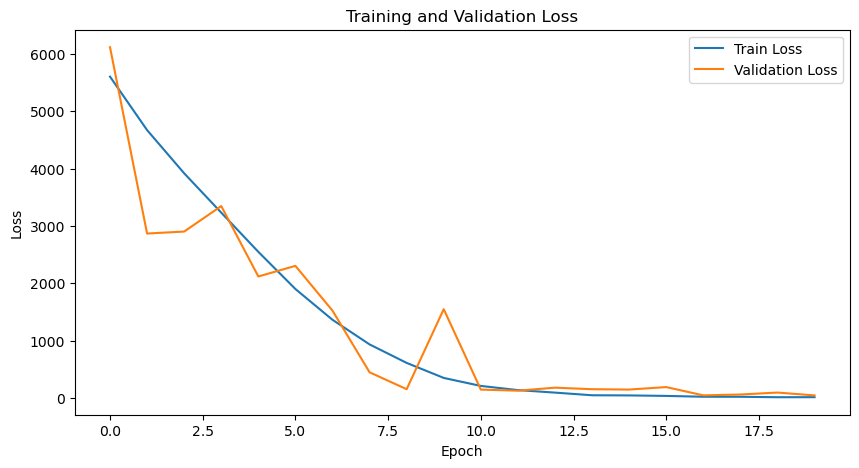

In [18]:
# Plot the training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [19]:
# Save the trained model
torch.save(resnet.state_dict(), "resnet18CT_Rudimentary.pth")